In [ ]:
{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "name": "Julia on Colab.ipynb",
      "version": "0.3.2",
      "provenance": []
    },
    "kernelspec": {
      "name": "julia-1.5",
      "display_name": "Julia 1.5"
    },
    "accelerator": "GPU"
  },
  "cells": [
    {
      "metadata": {
        "id": "oMSuTc3pDlHv",
        "colab_type": "code",
        "colab": {}
      },
      "cell_type": "code",
      "source": [
        ""
      ],
      "execution_count": 0,
      "outputs": []
    }
  ]
}

LoadError: ignored

Run the following lines to charge Julia environment

NameError: ignored

In [ ]:
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.5/julia-1.5.0-linux-x86_64.tar.gz" -o julia.tar.gz
!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*
!julia -e 'using Pkg; pkg"add IJulia;  precompile"'  
!echo "DONE"

   Updating registry at `~/.julia/registries/General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
Precompiling project...
DONE


In [ ]:
JULIA_NUM_THREADS=4
!julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict("JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'

KERNEL_DIR='julia -e "using IJulia; print(IJulia.kerneldir())"'
KERNEL_NAME='ls -d "$KERNEL_DIR"/julia*'
!mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.5
/bin/bash: -c: line 0: syntax error near unexpected token `IJulia.kerneldir'
/bin/bash: -c: line 0: `mv -f ls -d "$KERNEL_DIR"/julia* "julia -e "using IJulia; print(IJulia.kerneldir())""/julia'


Now switch to Julia 1.5.0 (Runtime/Change Runtime/Julia 1.5.0).
Once you have switched to Julia, add package using Pkg.add("NewPackageName")


In [ ]:
import Pkg; 
Pkg.add("Distributed")
Pkg.add("Random"); 
Pkg.add("Distributions"); 
Pkg.add("DelimitedFiles"); 
Pkg.add("LinearAlgebra")
Pkg.add("Plots"); 
Pkg.add("PyPlot");
Pkg.add("ColorSchemes");
Pkg.add("SharedArrays")
precompile

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [8ba89e20] + Distributed
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [9a3f8284] + Random
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
  Installed Distributions ──────────────── v0.23.12
  Installed DataAPI ────────────────────── v1.3.0
  Installed StatsBase ──────────────────── v0.33.1
  Installed SpecialFunctions ───────────── v0.10.3
  Installed Rmath ──────────────────────── v0.6.1
  Installed Rmath_jll ──────────────────── v0.2.2+1
  Installed Missings ───────────────────── v0.4.4
  Installed CompilerSupportLibraries_jll ─ v0.3.3+0
  Installed StaticArrays ───────────────── v0.12.4
  Installed OrderedCollections ─────────── v1.3.1
  Installed PDMats ─────────────────────── v0.10.1
  Installed Compat ─────────────────────── v3.17.0
  Installed StatsFuns ──────

precompile (generic function with 2 methods)

In [ ]:
using Pkg; using Distributed; using Distributions; using DelimitedFiles; using Plots; using PyPlot; using ColorSchemes; using Base.Threads;using Random; using LinearAlgebra; using SharedArrays; gr()

Plots.GRBackend()

In [ ]:
nthreads()

2

If you want to use Python code anyway, use Julia package "Pycall"

In [ ]:
ENV["PYTHON"] = "/usr/bin/python3"

"/usr/bin/python3"

In [ ]:
pkg"dev PyCall"

    Cloning git-repo `https://github.com/JuliaPy/PyCall.jl.git`


  Resolving package versions...
  Installed MacroTools ─ v0.5.5
Updating `~/.julia/environments/v1.5/Project.toml`
  [438e738f] + PyCall v1.91.4 `~/.julia/dev/PyCall`
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [1914dd2f] + MacroTools v0.5.5
  [438e738f] + PyCall v1.91.4 `~/.julia/dev/PyCall`
   Building PyCall → `~/.julia/dev/PyCall/deps/build.log`


In [ ]:
using PyCall

┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1278


In [ ]:
file = pyimport("google.colab.files")

PyObject <module 'google.colab.files' from '/usr/local/lib/python3.6/dist-packages/google/colab/files.py'>

Here comes the code

In [ ]:
#Define space :

# Description of an experiment in a cavity
# The experiment here is in free space, uncomment to place yourself in the conditions of this experiment

@everywhere const Lx = 5*10^(-3); #length of the cavity along x-axis - in m
@everywhere const Ly = 5*10^(-3); #length of the cavity along y-axis - in m
@everywhere const Lz = 10*10^(-3); #lenth of the cavity along z-axis - in m
#The origin is placed at the center of the cavity
@everywhere const Bx = Lx/2; #extreme point along x axis
@everywhere const By = Ly/2; #extreme point along y axis
@everywhere const Bz = Lz/2; #extreme point along z axis

#General Physical constants:

@everywhere const mu0 = 4*pi*10^(-7) #T.m/A
@everywhere const k_B = 1.3806504*10^(-23) #J/K
@everywhere const e = 1.602176487*10^(-19) #C
@everywhere const a0 = 0.52917720859*10^(-10)#m #Bohr Radius
@everywhere const c = 299792458 #m/s
@everywhere const h = 6.62607004*10^(-34) #m².kg/s
@everywhere const muB = 9.274009994*10^(-24) #J.T-1
@everywhere const R = 8.3145 #J.K-1.mol-1#Gas constant
@everywhere const Na = 6.02*10^23 #mol-1 #Avogadro's number

#Initial Properties of Cesium gaz:

@everywhere const m = 2.2*10^(-25) #kg
@everywhere const P = 10^(-7); #Pa #Pressure 
@everywhere V = Lx*Ly*Lz; #m^3 #Volume
@everywhere const T = 293; #°K #Temperature
@everywhere n = P*V/(R*T); #mol #Quantity of Cesium atoms
@everywhere N = round(Int, n*Na) #Number of Cesium atoms

#Model Cesium atoms as 4-level atoms:
#Transition Cs |6S(1/2) L = 0, mL = 0> -> Cs |6P(3/2) L=1, mL = -1,0,1>

@everywhere const wa = 2*pi*351.72571850*10^(12) #rad.s-1 #transition frequency
@everywhere const γ = 2*pi*5.18*10^6 #Hz #decay rate
const tau = 30.405*10^(-9) #s #lifetime
const vr = 3.5225 * 10^(-3) #m.s-1 #recoil velocity
const wr = 2*pi*2.0663*10^3 #Hz #recoil "energy"
const Tr = 198.34 * 10^(-9) #K #recoil Temperature
const Td = 125.61*10^(-6) #K #doppler Temperature
const d = 2.5886*e*a0
@everywhere const Is = 11.049 #W/m^2 #Staturation Intensity for a σ+- light for a Cs |6S(1/2) F = 4, mF = +-4> -> Cs |6P(3/2) F = 5, mF = +-5>
@everywhere const gL = 0.99999587 #Electron-orbital g-factor

#Magnetic field

@everywhere function B(x::Float64, y::Float64, z::Float64)
    A0 = 1 #T/m
    return A0*[x; y; -2*z]
end

#Beam properties:

@everywhere const Dl = 11*10^(-2) #m #diameter of the beam at the origin
@everywhere const δ = -0.5*γ #s-1 #detuning frequency
@everywhere const wl = wa + δ #rad.s-1 #laser frequency
@everywhere const λ = 2*pi*c/wl #m #laser wavelength
@everywhere const k = wl/c #rad.m-1 #laser wave number
@everywhere const I0 = 0.1*Is #intensity at the center of each beam
@everywhere const E0 = 2*I0*c*mu0
@everywhere const w0 = Dl/2 #cm 
@everywhere const zR = pi*w0^2/λ

#spherical coordinates
@everywhere e1 = [1; 0; 0]
@everywhere e0 = [0; 1; 0]
@everywhere e_1 = [0; 0; 1]

function Ex(x::Float64,y::Float64,z::Float64)
#Total electric field in the MOT along x
#Irrelevant

    comp_a = -e^(-(x^2+z^2)/w0^2/(1+sqrt(1+(y/zR)^2)))/sqrt(1+(y/zR)^2)*sin(k*y+k*(x^2+z^2)/y/(1+(zR/y)^2)-atan(y/zR))
    comp_b = e^(-(y^2+x^2)/w0^2/(1+sqrt(1+(z/zR)^2)))/sqrt(1+(z/zR)^2)*cos(k*z+k*(y^2+x^2)/z/(1+(zR/z)^2)-atan(z/zR))
    return sqrt(2)*E0/(comp_a + comp_b)
  end

function Ey(x::Float64,y::Float64,z::Float64)
#Total electric field in the MOT along y
#Irrelevant

    comp_a = e^(-(z^2+y^2)/w0^2/(1+sqrt(1+(x/zR)^2)))/sqrt(1+(x/zR)^2)*cos(k*x+k*(z^2+y^2)/x/(1+(zR/x)^2)-atan(x/zR))
    comp_b = e^(-(y^2+x^2)/w0^2/(1+sqrt(1+(z/zR)^2)))/sqrt(1+(z/zR)^2)*sin(k*z+k*(y^2+x^2)/z/(1+(zR/z)^2)-atan(z/zR))
    return sqrt(2)*E0/(comp_a + comp_b)
  end

function Ez(x::Float64,y::Float64,z::Float64)
#Total electric field in the MOT along x
#Irrelevant

    comp_a = -e^(-(z^2+y^2)/w0^2/(1+sqrt(1+(x/zR)^2)))/sqrt(1+(x/zR)^2)*sin(k*x+k*(z^2+y^2)/x/(1+(zR/x)^2)-atan(x/zR))
    comp_b = e^(-(x^2+z^2)/w0^2/(1+sqrt(1+(y/zR)^2)))/sqrt(1+(y/zR)^2)*cos(k*y+k*(x^2+z^2)/y/(1+(zR/y)^2)-atan(y/zR))
    return sqrt(2)*E0/(comp_a + comp_b)
  end

@everywhere function EA1(x::Float64,y::Float64,z::Float64)
  #Beam A1 : sigma - polarized transverse gaussian light propagating in the direction -ex
    return -1/sqrt(1+(x/zR)^2)*exp(-1*(z^2+y^2)/w0^2/(1+(x/zR)^2))*e^(1im*(k*x+k*(z^2+y^2)*x/2/zR^2/(1+(x/zR)^2)-atan(x/zR)))*(e0+1im*e_1)/sqrt(2)
end

@everywhere function EA2(x::Float64,y::Float64,z::Float64)
  #Beam A2 : sigma - polarized transverse gaussian light propagating in the direction +ex  
    return 1/sqrt(1+(x/zR)^2)*exp(-1*(z^2+y^2)/w0^2/(1+(x/zR)^2))*e^(-1im*(k*x+k*(z^2+y^2)*x/2/zR^2/(1+(x/zR)^2)-atan(x/zR)))*(e0-1im*e_1)/sqrt(2)
end

@everywhere function EB1(x::Float64,y::Float64,z::Float64)
  #Beam B1 : sigma - polarized transverse gaussian light propagating in the direction -ey  
    return -1/sqrt(1+(y/zR)^2)*exp(-1*(x^2+z^2)/w0^2/(1+(y/zR)^2))*e^(1im*(k*y+k*(x^2+z^2)*y/2/zR^2/(1+(y/zR)^2)-atan(y/zR)))*(e_1+1im*e1)/sqrt(2)
end

@everywhere function EB2(x::Float64,y::Float64,z::Float64)
  #Beam B2 : sigma - polarized transverse gaussian light propagating in the direction +ey 
    return 1/sqrt(1+(y/zR)^2)*exp(-1*(x^2+z^2)/w0^2/(1+(y/zR)^2))*e^(-1im*(k*y+k*(x^2+z^2)*y/2/zR^2/(1+(y/zR)^2)-atan(y/zR)))*(e_1-1im*e1)/sqrt(2)
end

@everywhere function EC1(x::Float64,y::Float64,z::Float64)
  #Beam C1 : sigma + polarized transverse gaussian light propagating in the direction -ez  
    return -1/sqrt(1+(z/zR)^2)*exp(-1*(y^2+x^2)/w0^2/(1+(z/zR)^2))*e^(1im*(k*z+k*(y^2+x^2)*z/2/zR^2/(1+(z/zR)^2)-atan(z/zR)))*(e1-1im*e0)/sqrt(2)
end

@everywhere function EC2(x::Float64,y::Float64,z::Float64)
  #Beam C2 : sigma + polarized transverse gaussian light propagating in the direction +ez  
    return 1/sqrt(1+(z/zR)^2)*exp(-1*(y^2+x^2)/w0^2/(1+(z/zR)^2))*e^(-1im*(k*z+k*(y^2+x^2)*z/2/zR^2/(1+(z/zR)^2)-atan(z/zR)))*(e1+1im*e0)/sqrt(2)
end

@everywhere function E_A1(x::Float64,y::Float64,z::Float64) #Intensity beam A1
   #Beam A1 : sigma - polarized transverse gaussian light propagating in the direction -ex
   #maximum intensity reached at the origin  
   kA1 = [-1; 0; 0] 
   U = [-1/sqrt(2) 0 1/sqrt(2); -1im/sqrt(2) 0 1im/sqrt(2); 0 1 0]
   B_vector = B(x,y,z)
   B_value = norm(B_vector)
   
   if B_value == 0
      return EA1(x,y,z)
   else
      B_vector = B_vector/B_value
      v = cross(kA1, B_vector)
      c = dot(B_vector,kA1)
      
      if c == -1
        return U*[-1 0 0; 0 -1 0; 0 0 1]*adjoint(U)*EA1(x,y,z)
      
      else
        v_cross_product_matrix = [0 -v[3] v[2] ; v[3] 0 -v[1]; -v[2] v[1] 0]
        R = UniformScaling(1.) + v_cross_product_matrix + v_cross_product_matrix^2/(1+c)    
        return U*R*EA1(x,y,z)
      end
    end
end

@everywhere function E_A2(x::Float64, y::Float64,z::Float64) #Intensity beam A2
  #Beam A2 : sigma + polarized transverse gaussian light propagating in the direction +ex  
  #maximum intensity reached at the origin
   kA2 = [1; 0; 0] 
   U = [-1/sqrt(2) 0 1/sqrt(2); -1im/sqrt(2) 0 1im/sqrt(2); 0 1 0]
   B_vector = B(x,y,z)
   B_value = norm(B_vector)
   
   if B_value == 0
      return EA2(x,y,z)
   else
      B_vector = B_vector/B_value
      v = cross(kA2, B_vector)
      c = dot(B_vector,kA2)
      if c == -1
        return U*[-1 0 0; 0 -1 0; 0 0 1]*adjoint(U)*EA2(x,y,z) 
      else
        v_cross_product_matrix = [0 -v[3] v[2] ; v[3] 0 -v[1]; -v[2] v[1] 0]
        R = UniformScaling(1.) + v_cross_product_matrix + v_cross_product_matrix^2/(1+c)   
        return U*R*EA2(x,y,z) 
      end
    end
end

@everywhere function E_B1(x::Float64,y::Float64,z::Float64) #Intensity beam B1
  #Beam B1 : sigma - polarized transverse gaussian light propagating in the direction -ey  
  #maximum intensity reached at the origin
   kB1 = [0; -1; 0] 
   U = [-1/sqrt(2) 0 1/sqrt(2); -1im/sqrt(2) 0 1im/sqrt(2); 0 1 0]
   B_vector = B(x,y,z)
   B_value = norm(B_vector)
   
   if B_value == 0
   
      return EB1(x,y,z)
   
   else
      
      B_vector = B_vector/B_value
      v = cross(kB1, B_vector)
      c = dot(B_vector,kB1)
      
      if c == -1
        return U*[-1 0 0; 0 -1 0; 0 0 1]*adjoint(U)*EB1(x,y,z) 
   
      else
        v_cross_product_matrix = [0 -v[3] v[2] ; v[3] 0 -v[1]; -v[2] v[1] 0]
        R = UniformScaling(1.) + v_cross_product_matrix + v_cross_product_matrix^2/(1+c)    
        return U*R*EB1(x,y,z)
      end
   end
end

@everywhere function E_B2(x::Float64,y::Float64,z::Float64) #Intensity beam B2
  #Beam B2 : sigma + polarized transverse gaussian light propagating in the direction +ey 
  #maximum intensity reached at the origin
   kB2 = [0; 1; 0] 
   U = [-1/sqrt(2) 0 1/sqrt(2); -1im/sqrt(2) 0 1im/sqrt(2); 0 1 0]
   B_vector = B(x,y,z)
   B_value = norm(B_vector)
   
   if B_value == 0
   
      return EB2(x,y,z)
   
   else
      
      B_vector = B_vector/B_value
      v = cross(kB2, B_vector)
      c = dot(B_vector,kB2)
      
      if c == -1
        return U*[-1 0 0; 0 -1 0; 0 0 1]*adjoint(U)*EB2(x,y,z) 
      else   
        v_cross_product_matrix = [0 -v[3] v[2] ; v[3] 0 -v[1]; -v[2] v[1] 0]
        R = UniformScaling(1.) + v_cross_product_matrix + v_cross_product_matrix^2/(1+c)    
        return U*R*EB2(x,y,z)
      end
   end
end

@everywhere function E_C1(x::Float64,y::Float64,z::Float64) #Intensity beam C1
  #Beam C1 : Transverse gaussian sigma - polarized light propagating in the direction -ez  
  #maximum intensity reached at the origin
   kC1 = [0; 0; -1] 
   U = [-1/sqrt(2) 0 1/sqrt(2); -1im/sqrt(2) 0 1im/sqrt(2); 0 1 0]
   B_vector = B(x,y,z)
   B_value = norm(B_vector)
   
   if B_value == 0
   
      return EC1(x,y,z)
   
   else
      
      B_vector = B_vector/B_value
      v = cross(kC1, B_vector)
      c = dot(B_vector,kC1)
      
      if c == -1
        return U*[-1 0 0; 0 -1 0; 0 0 1]*adjoint(U)*EC1(x,y,z) 
      else
        v_cross_product_matrix = [0 -v[3] v[2] ; v[3] 0 -v[1]; -v[2] v[1] 0]
        R = UniformScaling(1.) + v_cross_product_matrix + v_cross_product_matrix^2/(1+c)    
        return U*R*EC1(x,y,z)
      end
   end
end

@everywhere function E_C2(x::Float64,y::Float64,z::Float64) #Intensity beam C2
  #Beam C2 : sigma + polarized gaussian light propagating in the direction +ez  
  #maximum intensity reached at the origin
   kC2 = [0; 0; 1] 
   U = [-1/sqrt(2) 0 1/sqrt(2); -1im/sqrt(2) 0 1im/sqrt(2); 0 1 0]
   B_vector = B(x,y,z)
   B_value = norm(B_vector)
   
   if B_value == 0
   
      return EC2(x,y,z)
   
   else
      
      B_vector = B_vector/B_value
      v = cross(kC2, B_vector)
      c = dot(B_vector,kC2)
      
      if c == -1
        return U*[-1 0 0; 0 -1 0; 0 0 1]*adjoint(U)*EC2(x,y,z) 
      else
        v_cross_product_matrix = [0 -v[3] v[2] ; v[3] 0 -v[1]; -v[2] v[1] 0]
        R = UniformScaling(1.) + v_cross_product_matrix + v_cross_product_matrix^2/(1+c)    
        return U*R*EC2(x,y,z)
      end
   end
end

@everywhere function sA2(x::Float64,y::Float64,z::Float64) #saturation parameter Beam A2
    return abs.(E_A2(x,y,z)).^2*I0/Is
end

@everywhere function sA1(x::Float64,y::Float64,z::Float64) #saturation parameter Beam A1
    return abs.(E_A1(x, y, z)).^2*I0/Is
end

@everywhere function sB2(x::Float64,y::Float64,z::Float64) #saturation parameter Beam B2
    return abs.(E_B2(x, y, z)).^2*I0/Is
end

@everywhere function sB1(x::Float64,y::Float64,z::Float64) #saturation parameter Beam B1
    return abs.(E_B1(x, y, z)).^2*I0/Is
end

@everywhere function sC1(x::Float64,y::Float64,z::Float64) #saturation parameter Beam C1
    return abs.(E_C1(x, y, z)).^2*I0/Is
end

@everywhere function sC2(x::Float64,y::Float64,z::Float64) #saturation parameter Beam C2
    return abs.(E_C2(x, y, z)).^2*I0/Is
end

#Simulation time :

@everywhere const t =  10*10^(-3)#s #time of the simulation
@everywhere const dt = 0.1/γ; #time step
@everywhere const Nt = convert(Int, round(t/dt)); #number of iteration

In [ ]:
print("N = ", N, "\n")
print("wa = ",wa,"\n") 
print("δ = ", δ, "\n")
print("wl = ", wl, "\n")
print("λ = ", λ, "\n")
print("k = ", k, "\n")
print("γ = ",γ, "\n")
print("tau = ", tau, "\n")
print("Is =", Is, "\n")
print("Nt = ", Nt, "\n")
print("dt = ", dt, "\n")
print(h/2/pi/m*k)

N = 12
wa = 2.2099578666363832e15
δ = -1.6273449945595128e7
wl = 2.2099578503629332e15
λ = 8.523472820983929e-7
k = 7.371625907823649e6
γ = 3.2546899891190257e7
tau = 3.040500000000001e-8
Is =11.049
Nt = 3254690
dt = 3.0724892488782887e-9
0.003533594910711686

Let's first plot the initial situation

In [ ]:
#Let's plot the intensities of each beam over the space
X = range(-Bx, stop = Bx, length = 1000)
Y = range(-By, stop = By, length = 1000)
Z = range(-Bz, stop = Bz, length = 1000)

png(Plots.plot(X,Y,[I0*norm(EA1(x,y,0.)) for x in X, y in Y],st=:surface, xlabel = "x(m)", ylabel = "y(m)", zlabel = "|EA1|²(x,y,0)", title = "Intensity of beam A1 over plane z = 0"), "IA1")
png(Plots.plot(X,Y,[I0*norm(EA2(x,y,0.)) for x in X, y in Y],st=:surface, xlabel = "x(m)", ylabel = "y(m)", zlabel = "|EA2|²(x,y,0)", title = "Intensity  of beam A2 over plane z = 0"), "IA2")
png(Plots.plot(X,Y,[I0*norm(EB1(x,y,0.)) for x in X, y in Y],st=:surface, xlabel = "x(m)", ylabel = "y(m)", zlabel = "|EB1|²(x,y,0)", title = "Intensity  of beam B1 over plane z = 0"), "IB1")
png(Plots.plot(X,Y,[I0*norm(EB2(x,y,0.)) for x in X, y in Y],st=:surface, xlabel = "x(m)", ylabel = "y(m)", zlabel = "|EB2|²(x,y,0)", title = "Intensity  of beam B2 over plane z = 0"), "IB2")
png(Plots.plot(Y,Z,[I0*norm(EC1(0.,y,z)) for y in Y, z in Z],st=:surface, xlabel = "y(m)", ylabel = "z(m)", zlabel = "|EC1|²(0,y,z)", title = "Intensity  of beam C1 over plane x = 0"), "IC1")
png(Plots.plot(Y,Z,[I0*norm(EC2(0.,y,z)) for y in Y, z in Z],st=:surface, xlabel = "y(m)", ylabel = "z(m)", zlabel = "|EC2|²(0,y,z)", title = "Intensity  of beam C2 over plane x = 0"), "IC2")

In [ ]:
png(Plots.plot(X,Y,[norm(sA1(x,y,0.)) for x in X, y in Y],st=:surface, xlabel = "x(m)", ylabel = "y(m)", zlabel = "|sA1|²(x,y,0)", title = "Total saturation rate of beam A1 over plane z = 0"), "sA1")
png(Plots.plot(X,Y,[sA1(x,y,0.)[1] for x in X, y in Y],st=:surface, xlabel = "x(m)", ylabel = "y(m)", zlabel = "sA1_+(x,y,0)", title = "Saturation rate of right-polarized part of beam A1 over plane z = 0"), "sA1+")
png(Plots.plot(X,Y,[sA1(x,y,0.)[2] for x in X, y in Y],st=:surface, xlabel = "x(m)", ylabel = "y(m)", zlabel = "sA1_0(x,y,0)", title = "Saturation rate of linear part beam A1 over plane z = 0"), "sA10")
png(Plots.plot(X,Y,[sA1(x,y,0.)[3] for x in X, y in Y],st=:surface, xlabel = "x(m)", ylabel = "y(m)", zlabel = "sA1_-(x,y,0)", title = "Saturation rate of left-polarized part of beam A1 over plane z = 0"), "sA1-")


In [ ]:
#Let's plot the B field in the plane x = 0
Y = range(-By, stop = By, length = 20)
Z = range(-Bz, stop = Bz, length = 20)
png(Plots.quiver(reshape([y for y in Y, z in Z],400), reshape([z for y in Y, z in Z],400),quiver=(1/20*reshape([B(0.,y,z)[2] for y in Y, z in Z], 400), 1/20*reshape([B(0.,y,z)[3] for y in Y, z in Z], 400)), c=:inferno, xlabel = "y(m)", ylabel = "z(m)", title = "B field over plane x = 0"), "Bfield")

Let's now go into the simulation

In [ ]:
addprocs(4)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [ ]:
workers()

1-element Array{Int64,1}:
 1

In [ ]:
@everywhere using Pkg; using Distributed; using Random; using LinearAlgebra; using SharedArrays

In [ ]:
#Position vectors are taken randomly following a uniform distribution over space
particles_x = Bx*(1. .- 2*rand(Float64, N)); 
particles_y = By*(1. .- 2*rand(Float64, N));
particles_z = Bz*(1. .- 2*rand(Float64, N));

#If you want to initialize by hand
#particles_x = [-2*Bx, -Bx, -Bx/2, -Bx /4, 0, Bx/8, Bx/4, Bx/2, Bx, 2*Bx]
#particles_y = [-2*By, -By, -By/2, -By /4, 0, By/8, By/4, By/2, By, 2*By]
#particles_z = [-2*Bz, -Bz, -Bz/2, -Bz /4, 0, Bz/8, Bz/4, Bz/2, Bz, 2*Bz]

#if you want to work with a file
#writedlm(file_position,particles_x)
#if filesize(file_position)==0
#    writedlm(file_position, [particles_x zeros(N,Nt+1)])
#else
#    writedlm(file_position, [particles_x zeros(N, Nt+1); readdlm(file_position)])
#end

current_position = [particles_x particles_y particles_z]; #position at t=0
position_over_time = zeros(Float64, (N, 3*(Nt+1))); #list storing positions;
position_over_time[1:N,1:3] = current_position

12×3 Array{Float64,2}:
 -0.00247994    0.000419079  -0.000890438
 -0.0013091     0.00108807   -0.00345992
  0.000268289  -0.00102439    0.000818438
  0.00183679    0.00232857    0.00440162
 -0.00178805    0.000175939  -0.000553496
  0.000193213  -0.00183158    0.00458745
  0.000929943   0.00237314    0.00481728
 -0.000237343   0.00136883    0.00247682
 -0.000653866   9.09162e-5    0.00414961
 -0.000399988   0.000793461   0.00208122
 -0.0023761    -0.000646133   0.00136927
  0.00183036    0.00152522   -0.00434382

In [ ]:
#Velocity vectors are taken randomly following a Maxwell-Boltzmann distribution over space
#Equivalent : Each component of each velocity vector is taken randomly following a Gaussian distribution over space

dist = Normal() #Normal distribution
sigma = sqrt(k_B*T/m) #Variance
particles_vx = sigma*rand(dist, N);
particles_vy = sigma*rand(dist, N);
particles_vz = sigma*rand(dist, N);

#Arbitrary Velocity vectors
#particles_vx = -10.0*ones(N)
#particles_vy = zeros(N)
#particles_vz = zeros(N)

#if you want to work with a file
#writedlm(file_speed, particles_vx)
#if filesize(file_speed)==0
#    writedlm(file_speed, [molecules_vx zeros(N,Nt-1)])
#else
#    writedlm(file_speed, [molecules_vx zeros(N,Nt-1); readdlm(file_speed)])
#end

current_speed = [particles_vx particles_vy particles_vz]; #speed at t=0
speed_over_time = zeros(Float64, (N, 3*(Nt+1)) ); #list storing the speeds
speed_over_time[1:N, 1:3] = current_speed

12×3 Array{Float64,2}:
   31.2247    -201.736     150.79
   99.4498     211.983    -108.823
 -127.539      121.787      32.5571
  -68.9518      -4.00802  -208.253
  -15.4611     171.384      74.1015
   60.1214     -65.9764    -43.1687
 -156.399      -28.9989    -47.7302
  155.333      -75.773     179.755
    6.71593      1.80004   -15.758
  -83.4101     -43.5918     58.1325
    0.711474   -56.4118    105.397
  -14.6701      12.9604   -110.576

In [ ]:
#In the case of a cavity
#This function defines the behaviour of the atoms in the zone

function bouncing1(system)
    
    position = system[1] #initial positions of the atoms
    speed = system[2] #initial speeds of the atoms
    rectified_position = position[:] #stores the positions after the atoms having rebounced
    rectified_speed = speed[:] #stores the speeds after the atoms having rebouncedd
    
    x = position[1] #initial position along x
    vx = speed[1] #initial velocity along x

    for i = 1:N
    #for each particule

        particule_x = x[i] #extract its position
        particule_vx = vx[i]#extract its speed
        
        if particule_x^2>Bx^2 #The particle is considered outside the cavity if |x| > Bx

            rectified_position[1][i] = sign(particule_x)*(2*Bx-abs(particule_x)) #The extra trip outside the cavity was in fact made inside the cavity 
            rectified_speed[1][i] = -1*particule_vx #the speed flips (the particle rebounds)
        end
        #otherwise the particle is inside the cavity and no changes have to be operated.
    end
    
    return [rectified_position,rectified_speed] #return the new system
end 

bouncing1 (generic function with 1 method)

In [ ]:
function scatterA1!(new_speed::Array{Float64,1}, x :: Float64, y :: Float64, z :: Float64, vx :: Float64)
        
        z_shift = gL*muB*norm(B(x,y,z))/h*2*pi
        sA1_value = sA1(x,y,z)
        rho_A1 = [sA1_value[pol]/2/(1+sA1_value[pol]+(2*(δ+k*vx+(pol-2)*z_shift)/γ)^2) for pol in 1:3] #Probability of finding the two-level atom in an excited state at time t
        #Beam A1 emits in the direction -e_x sigma - polarized light

        γpA1 = γ*rho_A1 #Total scattering rate at time t
        PeeA1 = dt*γpA1 #Probability that a Photon has been scattered during a time dt
        rvaA1 = rand(Float64, 3) #random variable 1, following a uniform distribution on [0,1]

        for pol in 1:3
          if rvaA1[pol]<PeeA1[pol] #occures with probability Pee1
            
            #random_unitary_vector = [sin(thetaA1)*cos(phiA1), sin(thetaA1)*sin(phiA1), cos(thetaA1)]
            thetaA1 = 2*pi*rand(Float64) #random inclination of the emitted photon
            phiA1 = 2*pi*rand(Float64) #random azimuth of the emitted photon
            
            #v[t+dt] = v[t] + hbar*k/m(ex+random_unitary_vector)
            new_speed[1] = new_speed[1] + 6.62607004/2/pi*10^(-34)/m*k*(-1+sin(thetaA1)*cos(phiA1)) 
            new_speed[2] = new_speed[2] + 6.62607004/2/pi*10^(-34)/m*k*sin(thetaA1)*sin(phiA1)
            new_speed[3] = new_speed[3] + 6.62607004/2/pi*10^(-34)/m*k*cos(thetaA1)
          end  
        end    
end

function scatterA2!(new_speed::Array{Float64,1}, x :: Float64, y :: Float64, z::Float64, vx :: Float64)
        
        z_shift = gL*muB*norm(B(x,y,z))/h*2*pi
        sA2_value = sA2(x,y,z)
        rho_A2 = [sA2_value[pol]/2/(1+sA2_value[pol]+(2*(δ-k*vx+(pol-2)*z_shift)/γ)^2) for pol in 1:3] #Probability of finding the two-level atom in an excited state at time t
        #Beam A2 emits in the direction e_x sigma + polarized light

        γpA2 = γ*rho_A2 #Total scattering rate at time t
        PeeA2 = dt*γpA2 #Probability that a Photon has been scattered during a time dt
        rvaA2 = rand(Float64,3) #random variable 1, following a uniform distribution on [0,1]

        for pol in 1:3 

          if rvaA2[pol]<PeeA2[pol] #occures with probability PeeA2
            
            #random_unitary_vector = [sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)]
            thetaA2 = 2*pi*rand(Float64) #random inclination of the emitted photon
            phiA2 = 2*pi*rand(Float64) #random azimuth of the emitted photon
            
            #v[t+dt] = v[t] + hbar*k/m(ex+random_unitary_vector)
            new_speed[1] = new_speed[1] + 6.62607004/2/pi*10^(-34)/m*k*(1+sin(thetaA2)*cos(phiA2)) 
            new_speed[2] = new_speed[2] + 6.62607004/2/pi*10^(-34)/m*k*sin(thetaA2)*sin(phiA2)
            new_speed[3] = new_speed[3] + 6.62607004/2/pi*10^(-34)/m*k*cos(thetaA2)
          end
        end
end

function scatterB1!(new_speed::Array{Float64,1}, x :: Float64, y :: Float64, z::Float64, vy :: Float64)
        
        z_shift = gL*muB*norm(B(x,y,z))/h*2*pi
        sB1_value = sB1(x,y,z)
        rho_B1 = [sB1_value[pol]/2/(1+sB1_value[pol]+(2*(δ+k*vy+(pol-2)*z_shift)/γ)^2) for pol in 1:3] #Probability of finding the two-level atom in an excited state at time t
        #Beam B1 emits in the direction -e_y sigma - polarized light

        γpB1 = γ*rho_B1 #Total scattering rate at time t
        PeeB1 = dt*γpB1 #Probability that a Photon has been scattered during a time dt
        rvaB1 = rand(Float64,3) #random variable 1, following a uniform distribution on [0,1]
        
        for pol in 1:3

          if rvaB1[pol]<PeeB1[pol] #occures with probability Pee1
            
            #random_unitary_vector = [sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)]
            thetaB1 = 2*pi*rand(Float64) #random inclination of the emitted photon
            phiB1 = 2*pi*rand(Float64) #random azimuth of the emitted photon
            
            #v[t+dt] = v[t] + hbar*k/m(ex+random_unitary_vector)
            new_speed[1] = new_speed[1] + 6.62607004/2/pi*10^(-34)/m*k*(sin(thetaB1)*cos(phiB1)) 
            new_speed[2] = new_speed[2] + 6.62607004/2/pi*10^(-34)/m*k*(-1+sin(thetaB1)*sin(phiB1))
            new_speed[3] = new_speed[3] + 6.62607004/2/pi*10^(-34)/m*k*cos(thetaB1)
          
          end
            
        end
end

function scatterB2!(new_speed::Array{Float64,1}, x :: Float64, y :: Float64, z::Float64, vy :: Float64)
        
        z_shift = gL*muB*norm(B(x,y,z))/h*2*pi
        sB2_value = sB2(x,y,z)
        rho_B2 = [sB2_value[pol]/2/(1+sB2_value[pol]+(2*(δ-k*vy+(pol-2)*z_shift)/γ)^2) for pol in 1:3] #Probability of finding the two-level atom in an excited state at time t
        #Beam B2 emits in the direction +e_y sigma + polarized light

        γpB2 = γ*rho_B2 #Total scattering rate at time t
        PeeB2 = dt*γpB2 #Probability that a Photon has been scattered during a time dt
        rvaB2 = rand(Float64, 3) #random variable 1, following a uniform distribution on [0,1]

               for pol in 1:3

          if rvaB2[pol]<PeeB2[pol] #occures with probability Pee1
            
            #random_unitary_vector = [sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)]
            thetaB2 = 2*pi*rand(Float64) #random inclination of the emitted photon
            phiB2 = 2*pi*rand(Float64) #random azimuth of the emitted photon
            
            #v[t+dt] = v[t] + hbar*k/m(ex+random_unitary_vector)
            new_speed[1] = new_speed[1] + 6.62607004/2/pi*10^(-34)/m*k*(sin(thetaB2)*cos(phiB2)) 
            new_speed[2] = new_speed[2] + 6.62607004/2/pi*10^(-34)/m*k*(1+sin(thetaB2)*sin(phiB2))
            new_speed[3] = new_speed[3] + 6.62607004/2/pi*10^(-34)/m*k*cos(thetaB2)
          
          end
            
        end

end

function scatterC1!(new_speed::Array{Float64,1}, x :: Float64, y :: Float64, z::Float64, vz::Float64)
        
        z_shift = gL*muB*norm(B(x,y,z))/h*2*pi
        sC1_value = sC1(x,y,z)
        rho_C1 = [sC1_value[pol]/2/(1+sC1_value[pol]+(2*(δ+k*vz+(pol-2)*z_shift)/γ)^2) for pol in 1:3] #Probability of finding the two-level atom in an excited state at time t
        #Beam C1 emits in the direction -e_z sigma - polarized light

        γpC1 = γ*rho_C1 #Total scattering rate at time t
        PeeC1 = dt*γpC1 #Probability that a Photon has been scattered during a time dt
        rvaC1 = rand(Float64, 3) #random variable 1, following a uniform distribution on [0,1]

        for pol in 1:3
          if rvaC1[pol]<PeeC1[pol] #occures with probability Pee1
            
            #random_unitary_vector = [sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)]
            thetaC1 = 2*pi*rand(Float64) #random inclination of the emitted photon
            phiC1 = 2*pi*rand(Float64) #random azimuth of the emitted photon
            
            #v[t+dt] = v[t] + hbar*k/m(ex+random_unitary_vector)
            new_speed[1] = new_speed[1] + 6.62607004/2/pi*10^(-34)/m*k*(sin(thetaC1)*cos(phiC1)) 
            new_speed[2] = new_speed[2] + 6.62607004/2/pi*10^(-34)/m*k*(sin(thetaC1)*sin(phiC1))
            new_speed[3] = new_speed[3] + 6.62607004/2/pi*10^(-34)/m*k*(-1+cos(thetaC1))
          
          end
        
        end
end

function scatterC2!(new_speed::Array{Float64,1}, x :: Float64, y :: Float64, z::Float64, vz :: Float64)

        z_shift = gL*muB*norm(B(x,y,z))/h*2*pi
        sC2_value = sC2(x,y,z)
        rho_C2 = [sC2_value[pol]/2/(1+sC2_value[pol]+(2*(δ-k*vz+(pol-2)*z_shift)/γ)^2) for pol in 1:3]#Probability of finding the two-level atom in an excited state at time t
        #Beam C2 emits in the direction +e_z sigma + polarized light

        γpC2 = γ*rho_C2 #Total scattering rate at time t
        PeeC2 = dt*γpC2 #Probability that a Photon has been scattered during a time dt
        rvaC2 = rand(Float64, 3) #random variable 1, following a uniform distribution on [0,1]

        for pol in 1:3
        
          if rvaC2[pol] < PeeC2[pol] #occures with probability Pee1
            
            #random_unitary_vector = [sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)]
            thetaC2 = 2*pi*rand(Float64) #random inclination of the emitted photon
            phiC2 = 2*pi*rand(Float64) #random azimuth of the emitted photon
            
            #v[t+dt] = v[t] + hbar*k/m(ex+random_unitary_vector)
            new_speed[1] = new_speed[1] + 6.62607004/2/pi*10^(-34)/m*k*(sin(thetaC2)*cos(phiC2)) 
            new_speed[2] = new_speed[2] + 6.62607004/2/pi*10^(-34)/m*k*(sin(thetaC2)*sin(phiC2))
            new_speed[3] = new_speed[3] + 6.62607004/2/pi*10^(-34)/m*k*(1+cos(thetaC2))
          
          end
        end
end


scatterC2! (generic function with 1 method)

In [ ]:
function new_speed!(current_speed::Array{Array{Float64,1},1}, current_position::Array{Array{Float64,1},1}, former_speed::Array{Array{Float64,1},1}, former_position::Array{Array{Float64,1},1})
  
  for i = 1:N
    #for each particule
        
        #extract the position at time t-dt
        x = former_position[1][i] 
        y = former_position[2][i]
        z = former_position[3][i]

        #extract the speed at time t-dt
        vx = former_speed[1][i]
        vy = former_speed[2][i]
        vz = former_speed[3][i] 

        new_speed = [vx; vy; vz]

        ###Scattering Event###
        scatterA1!(new_speed, x, y, z, vx)
        scatterA2!(new_speed, x, y, z, vx)
        scatterB1!(new_speed, x, y, z, vy)
        scatterB2!(new_speed, x, y, z, vy)
        scatterC1!(new_speed, x, y, z, vz)
        scatterC2!(new_speed, x, y, z, vz)

        #the speed of particle i is changed only if the atom has emitted a photon
        current_speed[1][i] = new_speed[1] 
        current_speed[2][i] = new_speed[2]
        current_speed[3][i] = new_speed[3]
        current_position[1][i] = x + new_speed[1]*dt #in all cases, the position is changed 
        current_position[2][i] = y + new_speed[2]*dt
        current_position[3][i] = z + new_speed[3]*dt
    end
end

new_speed! (generic function with 1 method)

In [ ]:
function simulate!(position_over_time::Array{Array{Array{Float64,1},1},1}, speed_over_time::Array{Array{Array{Float64,1},1},1})

  for j = 1 : Nt #at each time step
            
    former_position = current_position[:] #the previous position was obtained at t-dt
    former_speed = current_speed[:] #the previous speed was obtained at t-dt
    current_position = [zeros(N), zeros(N), zeros(N)] #the position of each particle at time t is initiated at zero
    current_speed = [zeros(N), zeros(N), zeros(N)] #the speed of each particle at time t is initiated at zero

    new_speed!(current_speed,current_position, former_speed,former_position)
    position_over_time[j+1] = current_position[:]; 
    speed_over_time[j+1] = current_speed[:];

  end
  
end

In [ ]:
M = ceil(Int, N/4)
for i in 2:5
 simulate!(position_over_time, speed_over_time)

In [ ]:
function mean_squared_speed(speed :: Array{Array{Float64,1},1})
    
    #returns the instantaneous temperature of the system T= m/(degree_of_freedom*N*k_B)*sum_{i=1,N}(v_i^2) 
    #Here we have 1 degree of freedom
    
    v2 = 0
    
    for i in 1:N
    
        v2 = v2 + speed[1][i]^2 + speed[2][i]^2 + speed[3][i]^2
    
    end
    
    return 1/N*v2
end

mean_squared_speed (generic function with 1 method)

In [ ]:
squared_speed_over_time = [mean_squared_speed(current_speed) for current_speed in speed_over_time];

In [ ]:
function mean_speed(speed)

  #compute the mean of the system

  return 1/N*[sum(speed[1]),sum(speed[2]),sum(speed[3])]
  
end 

mean_speed (generic function with 1 method)

In [ ]:
mean_over_time = [mean_speed(current_speed) for current_speed in speed_over_time];

In [ ]:
variance_over_time = [sum(mean_over_time[j].^2) - squared_speed_over_time[j] for j in 1:Nt+1];

In [ ]:
space_time = [i*dt for i in 1:Nt+1];

In [ ]:
#We are interested in the mean squared speed over time
png(Plots.plot(space_time, squared_speed_over_time, title = "Mean of the squared speed over time", xlabel = "t (s)", ylabel = "<v²>(t) (m.s-1)"), "Squared_speed_3D6lasers_MOT") 

In [ ]:
#We are interested in the mean over time

png(Plots.plot(space_time, [mean[1] for mean in mean_over_time], title = "Mean speed along x absciss over time", xlabel = "t (s)", ylabel = "<vx>(t) (m/s)"), "Meanx_3D6lasers_MOT")
png(Plots.plot(space_time, [mean[2] for mean in mean_over_time], title = "Mean speed along y absciss over time", xlabel = "t (s)", ylabel = "<vy>(t) (m/s)"), "Meany_3D6lasers_MOT")
png(Plots.plot(space_time, [mean[3] for mean in mean_over_time], title = "Mean speed along z absciss over time", xlabel = "t (s)", ylabel = "<vz>(t) (m/s)"), "Meanz_3D6lasers_MOT")

In [ ]:
#We are interested in the variance over time
png(Plots.plot(space_time, variance_over_time, title = "Variance over time", xlabel = "t (s)", ylabel = "<v²(t)>-<v(t)>² (m/s)²"), "Variance_3D6lasers_MOT")

In [ ]:
file_data = string("simulation_data.txt")#stores the data of the particles over time
touch(file_data)

"simulation_data.txt"

In [ ]:
#We are interested in the minimum speed reached by the system
min_v = minimum(squared_speed_over_time)
data1 = string("minimum speed reached : ",sqrt(min_v)," m.s-1")
print(data1, "\n")

#add the data to the file
open(file_data, "a") do io
       write(io, data1)
end

minimum speed reached : 10.882930441421559 m.s-1


48

In [ ]:
#We are interested in the time it takes to get this speed
min_v_reached = findfirst(isequal(min_v),squared_speed_over_time)
data2 = string("minimum speed is reached after ", min_v_reached*dt, " s (that is, after ", min_v_reached," iteration)")
print(data2,"\n")
open(file_data, "a") do io
       write(io, data2)
end

minimum speed is reached after 0.0099884351838989 s (that is, after 3250926 iteration)


86

In [ ]:
#We are interested in the maximum variance reached
data3 = string("maximum variance reached : ", maximum(variance_over_time), " m2.s-2")
print(data3)
open(file_data, "a") do io
       write(io, data3)
end

maximum variance reached : -107.25987805265578 m2.s-2

53

In [ ]:
#We are interested in the dynamics of the atoms over time
for i = 1:N
    pltvx = Plots.plot(space_time,[speed_over_time[j][1][i] for j in 1:Nt+1], title = "Projected speed on x over time", xlabel = "t (s)", ylabel = "vx(t) (m/s)")  
    pltvy = Plots.plot(space_time,[speed_over_time[j][2][i] for j in 1:Nt+1], title = "Projected speed on y over time", xlabel = "t (s)", ylabel = "vy(t) (m/s)")
    pltvz = Plots.plot(space_time,[speed_over_time[j][3][i] for j in 1:Nt+1], title = "Projected speed on z over time", xlabel = "t (s)", ylabel = "vz(t) (m/s)")  

    pltx = Plots.plot(space_time,[position_over_time[j][1][i] for j in 1:Nt+1], title = "Position x over time", xlabel = "t (s)", ylabel = "x(t) (m)")  
    plty = Plots.plot(space_time,[position_over_time[j][2][i] for j in 1:Nt+1], title = "Position y over time", xlabel = "t (s)", ylabel = "y(t) (m)")
    pltz = Plots.plot(space_time,[position_over_time[j][3][i] for j in 1:Nt+1], title = "Position z over time", xlabel = "t (s)", ylabel = "z(t) (m)")  

    #show the two graphics on the same image
    png(Plots.plot(pltvx, pltx, layout = (2,1)), string("movement_x_part_",string(i),"_3D6lasers_MOT"))
    png(Plots.plot(pltvy, plty, layout = (2,1)), string("movement_y_part_",string(i),"_3D6lasers_MOT"))
    png(Plots.plot(pltvz, pltz, layout = (2,1)), string("movement_z_part_",string(i),"_3D6lasers_MOT"))  
end

In [ ]:
v2max = maximum([[sum(speed_over_time[j][i].^2) for i in 1:N] for j in 1:Nt])

LoadError: ignored

In [ ]:
anim = Animation()

for j in range(1, step=10000, stop = Nt+1) 

    X = range(-Bx, stop = Bx, length = 100)
    Y = range(-By, stop = By, length = 100)
    Z = range(-Bz, stop = Bz, length = 100)
    
    #Plots.plot(X,range(-w0, stop = w0, length = 100),[sqrt(w0^2-y^2) for x in X, y in range(-w0, stop = w0, length = 100)],st=:surface, c=:blues, opacity = 0.3,  leg = false, camera = (-30,30))
    #Plots.plot(X,range(-w0, stop = w0, length = 100),[-sqrt(w0^2-y^2) for x in X, y in range(-w0, stop = w0, length = 100)],st=:surface, c = :blues, opacity = 0.3, leg = false, camera = (-30,30))
    Plots.scatter(position_over_time[j][[1],:][1],position_over_time[j][[2],:][1],position_over_time[j][[3],:][1], title = string("Evolution of the system over time, t =", j*dt, " s"), xlabel = "x(m)", ylabel = "y(m)", zlabel = "z(m)", xlim = (-Bx,Bx), ylim = (-By,By), zlim= (-Bz,Bz), marker_z = [1/v2max[i]*sum(speed_over_time[j][i].^2) for i in 1:N], leg = false)
    #Plots.plot(range(-w0, stop = w0, length = 100),Y,[sqrt(w0^2-x^2) for x in range(-w0, stop = w0, length = 100), y in Y],st=:surface, c=:blues, opacity = 0.3, leg = false, camera = (-30,30) )
    #Plots.plot(range(-w0, stop = w0, length = 100),Y,[-sqrt(w0^2-x^2) for x in range(-w0, stop = w0, length = 100), y in Y],st=:surface, c=:blues, opacity = 0.3, leg = false, camera = (-30,30))
    Plots.frame(anim)
end
gif(anim, "simulation_3D3Lasers_doppler.gif", fps=1)

LoadError: ignored

In [ ]:
anim = Animation()

for k in range(1, step=1, stop = 10) 

    X = range(-Bx, stop = Bx, length = 100)
    Y = range(-By, stop = By, length = 100)
    Z = range(-Bz, stop = Bz, length = 100)
    
    Pyplot.plot(X,range(-w0, stop = w0, length = 100),[sqrt(w0^2-y^2) for x in X, y in range(-w0, stop = w0, length = 100)],st=:surface, c=:blues, opacity = 0.3,  leg = false, camera = (-30,30))
    Pyplot.plot!(X,range(-w0, stop = w0, length = 100),[-sqrt(w0^2-y^2) for x in X, y in range(-w0, stop = w0, length = 100)],st=:surface, c = :blues, opacity = 0.3, leg = false, camera = (-30,30))
    Pyplot.scatter!(position_over_time[3*k-2],position_over_time[3*k-1],position_over_time[3*k], title = "Evolution of the system over time", xlabel = "x(m)", ylabel = "y(m)", zlabel = "z(m)", xlim = (-Bx,Bx), ylim = (-By,By), zlim= (-Bz,Bz), marker_z = [1/v2max[j]*(speed_over_time[[3*k-2],:][1][j]^2 + speed_over_time[[3*k-1],:][1][j]^2 + speed_over_time[[3*k],:][1][j]^2) for j=1:N], leg = false)
    Pyplot.plot!(range(-w0, stop = w0, length = 100),Y,[sqrt(w0^2-x^2) for x in range(-w0, stop = w0, length = 100), y in Y],st=:surface, c=:blues, opacity = 0.3, leg = false, camera = (-30,30) )
    Pyplot.plot!(range(-w0, stop = w0, length = 100),Y,[-sqrt(w0^2-x^2) for x in range(-w0, stop = w0, length = 100), y in Y],st=:surface, c=:blues, opacity = 0.3, leg = false, camera = (-30,30))
    Pyplot.frame(anim)
end
gif(anim, "simulation_3D3Lasers_doppler.gif", fps=1)

LoadError: ignored

In [ ]:
#distribution of speed
anim = Animation()

for k in range(1, step=10000, stop=Nt+1)
    #plot(xlim = (-Bx, Bx),ylim = (-1, 1))    
    Plots.histogram([speed_over_time[j][1] speed_over_time[j][2] speed_over_time[j][3]],opacity = 0.6)
    Plots.frame(anim)
end
gif(anim, "speed_distribution_1D1Laser_doppler.gif", fps=1)

LoadError: ignored

After each simulation, we add the simulated atoms to a storage file

In [ ]:
#file storing the position
file_position = string("position_T_",T,".txt")#stores the position of the particles over time
touch(file_position)

#file storing the speed
file_speed = string("speed_T_",T,".txt") #stores the position of the particles over time
touch(file_speed) #create the file if it does not exist

"speed_T_1.txt"

In [ ]:
#add the new positions to the file
open(file_position, "a") do io
       writedlm(io, position_over_time)
       end
       
#add the new speeds to the file
open(file_speed, "a") do io
       writedlm(io, speed_over_time)
       end

Let's plot the environment



In [ ]:
#One way to visualize the intensity 
X = range(-Bx, stop = Bx, length = 1000)
Y = range(-By, stop = By, length = 1000)
Z = range(-Bz, stop = Bz, length = 1000)
png(Plots.plot(X,Y,[norm(E_A1(x,y,0)) for x in X, y in Y],st=:surface,camera=(-30,30)), xlabel = "x(m)", ylabel = "y(m)", zlabel = "I(x,y,0)", title = "Intensity of beam A1 over plane z = 0", "Intensity_A1")
png(Plots.plot(X,Y,[norm(E_A2(x,y,0)) for x in X, y in Y],st=:surface,camera=(-30,30)), xlabel = "x(m)", ylabel = "y(m)", zlabel = "I(x,y,0)", title = "Intensity of beam A2 over plane z = 0", "Intensity_A2")
png(Plots.plot(X,Y,[norm(E_B1(x,y,0)) for x in X, y in Y],st=:surface,camera=(-30,30)), xlabel = "x(m)", ylabel = "y(m)", zlabel = "I(x,y,0)", title = "Intensity of beam B1 over plane z = 0", "Intensity_B1")
png(Plots.plot(X,Y,[norm(E_B2(x,y,0)) for x in X, y in Y],st=:surface,camera=(-30,30)), xlabel = "x(m)", ylabel = "y(m)", zlabel = "I(x,y,0)", title = "Intensity of beam B2 over plane z = 0", "Intensity_B2")
png(Plots.plot(Y,Z,[norm(E_C1(0,y,z)) for y in Y, z in Z],st=:surface,camera=(-30,30)), xlabel = "y(m)", ylabel = "z(m)", zlabel = "I(0,y,z)", title = "Intensity of beam C1 over plane x = 0", "Intensity_C1")
png(Plots.plot(Y,Z,[norm(E_C2(0,y,z)) for y in Y, z in Z],st=:surface,camera=(-30,30)), xlabel = "y(m)", ylabel = "z(m)", zlabel = "I(0,y,z)", title = "Intensity of beam C2 over plane x = 0", "Intensity_C2")



LoadError: ignored

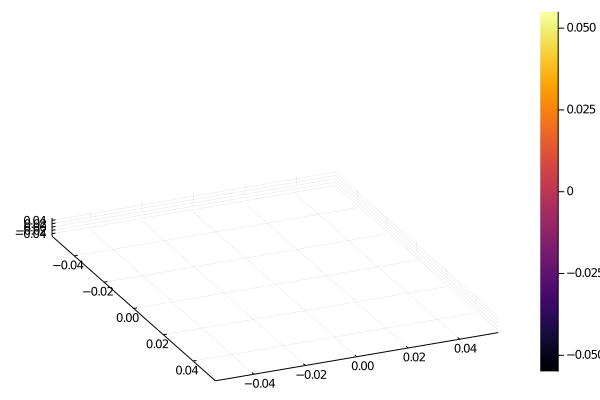

QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull d Qt QbB Qz
Options selected for Qhull 2015.2 2016/01/18:
  run-id 2120803229  delaunay  Qtriangulate  QbBound-unit-box 0.5
  Qz-infinity-point  _pre-merge  _zero-centrum  Pgood  _max-width  1
  Error-roundoff 6.9e-16  _one-merge 4.9e-15  _near-inside 2.4e-14
  Visible-distance 1.4e-15  U-coplanar-distance 1.4e-15  Width-outside 2.8e-15
  _wide-facet 8.3e-15

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p16(v3): -0.34 -0.34 -0.084
- p100(v2): 2.3e-17 2.3e-17   0.5
- p99(v1):   0.5   0.5  0.41
- p0(v0):  -0.5  -0.5  0.41

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 6.9e-16.  The center point, facets and distances
to the center point are as follows:

In [ ]:
X = range(-w0, stop = w0, length = 100)
Y = range(-w0, stop = w0, length = 100)
Z = range(-w0, stop = w0, length = 100)
Plots.plot(X,Y,[sqrt(-x^2+w0^2) for x in X],st=:surface)
Plots.plot!(X,Y,[-sqrt(-x^2+w0^2) for x in X],st=:surface)
Plots.plot!(X,Y,[sqrt(-y^2+w0^2) for y in Y],st=:surface)
Plots.plot!(X,Y,[-sqrt(-y^2+w0^2) for y in Y],st=:surface)
Plots.plot!(Y,Z,[-sqrt(-z^2+w0^2) for z in Z],st=:surface)
Plots.plot!(Y,Z,[-sqrt(-z^2+w0^2) for z in Z],st=:surface)

We are also interested in simulations involving more atoms

In [ ]:
positions_over_time = readdlm(file_position)
speeds_over_time = readdlm(file_speed)

tcmalloc: large alloc 4058939392 bytes == 0xb058000 @  0x7f82e963bb6b 0x7f82e965b379 0x7f82e8f307c8 0x7f82e8effd2d 0x7f82a990bf3b 0x7f82a990c10c 0x7f82e8ef7ef6 0x7f82e8ef7b40 0x7f82e8ef8544 0x7f82e8ef97a8 0x7f82e8f16a1a 0x7f82e8ee9206 0x7f82da8a3724 0x7f82d4fe2a3a 0x7f82a98fcadb 0x7f82e8edebf3 0x7f82e8eee9d4 0x7f82e8eef2b2 0x7f82d4fcf750 0x7f82d4fcf98f 0x7f82e8efd26f (nil)
tcmalloc: large alloc 1562255360 bytes == 0x1a41e2000 @  0x7f82e963bb6b 0x7f82e965b379 0x7f82e8f31611 0x7f82e8eff6cc 0x7f82a9910425 0x7f82a9910671 0x7f82a990ac1e 0x7f82a990bcf0 0x7f82a990ba26 0x7f82a990bf65 0x7f82a990c10c 0x7f82e8ef7ef6 0x7f82e8ef7b40 0x7f82e8ef8544 0x7f82e8ef97a8 0x7f82e8f16a1a 0x7f82e8ee9206 0x7f82da8a3724 0x7f82d4fe2a3a 0x7f82a98fcadb 0x7f82e8edebf3 0x7f82e8eee9d4 0x7f82e8eef2b2 0x7f82d4fcf750 0x7f82d4fcf98f 0x7f82e8efd26f (nil)
tcmalloc: large alloc 3740614656 bytes == 0x2013c4000 @  0x7f82e963bb6b 0x7f82e965b379 0x7f82e8f307c8 0x7f82e8effd2d 0x7f82a990bf3b 0x7f82a990c10c 0x7f82e8ef7ef6 0x7f82e8e

19528146×10 Array{Float64,2}:
  -1.2267     2.12016    1.70225  …   -4.54364   -11.3321     -4.2928
 -10.7969    13.245      2.85652      -1.35778    -3.98207     6.57705
  -0.993083  11.9513   -16.9648       11.3985      5.00412     7.40403
  -1.2267     2.12016    1.70225      -4.54364   -11.3321     -4.2928
 -10.7969    13.245      2.85652      -1.35778    -3.98207     6.57705
  -0.993083  11.9513   -16.9648   …   11.3985      5.00412     7.40403
  -1.2267     2.12016    1.70225      -4.54364   -11.3321     -4.2928
 -10.7969    13.245      2.85652      -1.35778    -3.98207     6.57705
  -0.993083  11.9513   -16.9648       11.3985      5.00412     7.40403
  -1.2267     2.12016    1.70225      -4.54364   -11.3321     -4.2928
 -10.7969    13.245      2.85652  …   -1.35778    -3.98207     6.57705
  -0.993083  11.9513   -16.9648       11.3985      5.00412     7.40403
  -1.2267     2.12016    1.70225      -4.54364   -11.3321     -4.2928
   ⋮                              ⋱                 

In [ ]:
Nb_simulation = convert(Int, size(positions_over_time)[1]/(3*(Nt+1)))

2

In [ ]:
vmax = maximum([[speeds_over_time[[(Nt+1)*(i-1)+3*k-2],:][j]^2 + speeds_over_time[[(Nt+1)*(i-1)+3*k-1],:][j]^2 + speeds_over_time[[(Nt+1)*(i-1)+3*k],:][j]^2 for j=1:N] for k in 1:Nt+1, i in 1:Nb_simulation])

10-element Array{Float64,1}:
 122.12728617213399
 320.5670614319697
 299.4090123726691
 250.0568797391279
 206.96746779238447
 278.65688733358
 202.773727658771
 148.83956760476565
 167.33987264342062
  92.88949919169248

In [ ]:
anim = Animation()

for k in range(1, step=10000, stop = Nt) 
    #x = range(-Bx, stop = Bx, length = 1000)
    #y = range(-By, stop = By, length = 1000)
    #z = range(-Bz, stop = Bz, length = 1000)
    plot3d(xlim = (-Bx, Bx),ylim = (-By, By),zlim = (-Bz, Bz))
    for i in 1:Nb_simulation
        scatter!(positions_over_time[[(Nt+1)*(i-1)+3*k-2],:],positions_over_time[[(Nt+1)*(i-1)+3*k-1],:],positions_over_time[[(Nt+1)*(i-1)+3*k],:], title = "Evolution of the system over time", xlabel = "x(m)", ylabel = "y(m)", zlabel = "z(m)", zcolor = [[round(1/3/vmax[j]*(speeds_over_time[[(Nt+1)*(i-1)+3*k-2],:][j]^2 + speeds_over_time[[(Nt+1)*(i-1)+3*k-1],:][j]^2 + speeds_over_time[[(Nt+1)*(i-1)+3*k],:][j]^2), digits = 5) for j=1:N]], leg = false)
    end
    Plots.frame(anim)
end
gif(anim, "simulation_3D3Lasers_doppler.gif", fps=10)

LoadError: ignored

Let's now interest ourselves on the force applied on the system

In [ ]:
#Method 1 : Sliding Mean
#Step A : smooth the the mean_over_time

p = 1000 #smooth parameter
proper_mean_speed = []

for j in p:Nt+1

   append!(proper_mean_speed, sum(mean_over_time[j-p+1:j])/p)

end
png(plot(time[p:Nt+1],proper_mean_speed, xlabel = "t (s)", ylabel = "<v(t)> (m.s-1)"), "Mean_speed_over_time_filtered")

In [ ]:
#Step B : Compute its derivative over time

derivative_mean_speed = []

for j in 2:Nt+2-p

    append!(derivative_mean_speed,(proper_mean_speed[j]-proper_mean_speed[j-1])/dt)

end

In [ ]:
#Step C : We are interested in comparing the computed derivative of the speed with the theory
expected_derivative = []
for speed in proper_mean_speed[2:Nt+2-p]
    append!(expected_derivative, 1/m*h/2/pi*k*γ/2*s(0)*(1/(1+s(0)+(2*(δ-k*speed)/γ)^2)))
end

In [ ]:
#Step D : Show the unfiltered derivative and compare it with the theory
#Plot the derivative of the speed as a function of the speed
#Plot the expected value of the Fore 
plt1 = plot(proper_mean_speed[2:Nt+2-p], derivative_mean_speed, label = "computed", title = "Derivative of mean speed in function of mean speed", xlabel = "<v>(t) (m.s-1)", ylabel = "d<v(t)>/dt (m/s)")
plot!(proper_mean_speed[2:Nt+2-p], expected_derivative, label = "theory") 
png(plt1, "Forces_1D1Laser")

In [ ]:
test2 = [[1;2];[1;2];[1;2]]
file_data = "mytestfile.txt"#stores the data of the particles over time
touch(file_data)
open(file_data, "a") do io
       writedlm(io, test2)
       end
result_test = readdlm(file_data)
print(result_test)

[1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 2.0; 1.0; 2.0; 1.0; 2.0]

Now, you can go to [1D2Lasers](https://colab.research.google.com/drive/1siLkJ8t9mFWwrorNqlWw1CHur62hV_bC#scrollTo=ag4PCq1W2hDf) or 2D1Laser[to be created]